In [25]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

## 向量的加法其实就是向量的平移
### 例如已有以下两个向量
### A0 ，B0

In [26]:
A0 = np.array([1,2])
B0 = np.array([2,1])
A0,B0

(array([1, 2]), array([2, 1]))

## 他们相加得到向量v0

In [27]:
v0 = A0+B0
v0

array([3, 3])

## 他们在空间中的转换过程就是向量A的路程+向量B的路程最终到达向量v顶点的位置

Text(0.5, 1.0, 'vectorA + vectorB')

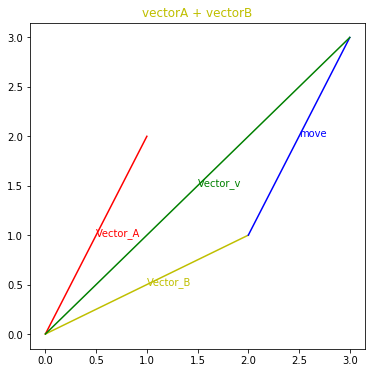

In [28]:
fig, ax = plt.subplots(1, 1,figsize=(int(v0[0])*2, int(v0[-1])*2),sharex=True)

ax.plot(np.linspace(0,A0[0],10),np.linspace(0,A0[-1],10),color='r')
ax.plot(np.linspace(0,B0[0],10),np.linspace(0,B0[-1],10),color='y')
ax.plot(np.linspace(B0[0],v0[0],10),np.linspace(B0[-1],v0[-1],10),color='b')
ax.plot(np.linspace(0,v0[0],10),np.linspace(0,v0[-1],10),color='g')

plt.text(np.linspace(B0[0],v0[0],10).mean(), np.linspace(B0[-1],v0[-1],10).mean(), "move",color='b')
ax.text(v0[0]/2,v0[-1]/2, 'Vector_v',color='g')
ax.text(A0[0]/2,A0[-1]/2, 'Vector_A',color='r')
ax.text(B0[0]/2,B0[-1]/2, 'Vector_B',color='y')
ax.set_title('vectorA + vectorB', fontsize=12, color='y')

# 内积又叫点积。定义是:两个向量对应的分量乘积之和 
## 比如 a = [1,2,3] , b = [4,5,6]
## 则 a,b 的内积等于 (1 x 4) + 
(2 x 5) + (3 x 6) = 32

In [49]:
a = np.array([1,2])
b = np.array([4,5])
np.dot(a,b),a.dot(b)

(14, 14)

In [57]:
plt.scatter(a[0],a[1])
plt.text()
plt.scatter(b[0],b[1])
plt.scatter(np.dot(a,b),0)

TypeError: text() missing 1 required positional argument: 's'

In [30]:
a = np.array([1,2,3])
b = np.array([4,5,6])
a.dot(b),np.dot(a,b)

(32, 32)

# **解方程**



## 创建一个矩阵

In [31]:
A =np.mat([[6, 4, 5],[6, 7, 6],[8, 1, 9]])
A

matrix([[6, 4, 5],
        [6, 7, 6],
        [8, 1, 9]])

## 行列式的结果向量v

In [32]:
v = np.array([2,1,4])[:,None]
v

array([[2],
       [1],
       [4]])

## 求出A的逆矩阵，矩阵逆运算就是单位矩阵变换到现在这个矩阵过程的函数，所以矩阵的逆就是矩阵变换的逆运算,


In [33]:
A.I

matrix([[ 0.83823529, -0.45588235, -0.16176471],
        [-0.08823529,  0.20588235, -0.08823529],
        [-0.73529412,  0.38235294,  0.26470588]])


### 用矩阵A逆,乘以原矩A,再乘以解x == A逆矩阵乘以向量v
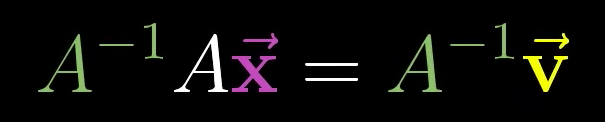 

## 用矩阵A乘以A的逆矩阵，就等于一次什么都不做的变换，将会返回单位矩阵

In [34]:
np.dot(A,A.I)

matrix([[ 1.00000000e+00, -5.55111512e-17,  0.00000000e+00],
        [ 4.44089210e-16,  1.00000000e+00,  0.00000000e+00],
        [ 2.22044605e-16, -5.55111512e-17,  1.00000000e+00]])


### 所以，解x == A.I 乘以 v
### 计做
### 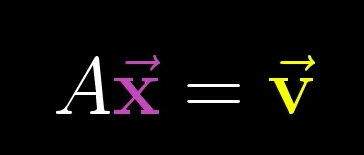
### 这个变换的过程，就对应于逆向进行变换，并跟踪v的动向
## 所以:想要求解方程，只需用A逆乘以向量v即可

In [35]:
np.dot(A.I,v)

matrix([[ 0.57352941],
        [-0.32352941],
        [-0.02941176]])

### 验证一下解的结果，A的逆乘以向量v得到解x
### 再用A乘以解x应该能够返回向量v

In [36]:
A*np.dot(A.I,v)==v

matrix([[ True],
        [ True],
        [ True]])

## 只要变化det(A)!==0
## 也就是它的行列式不为0，那A就存在逆变换,否则就没有逆变换
## 变换过程如下：


## 1.原矩阵

In [37]:
A

matrix([[6, 4, 5],
        [6, 7, 6],
        [8, 1, 9]])

## 1.1 它的v向量也就是行列式的等号右边那部分

In [38]:
v

array([[2],
       [1],
       [4]])

## 2.它逆矩阵

In [39]:
A.I

matrix([[ 0.83823529, -0.45588235, -0.16176471],
        [-0.08823529,  0.20588235, -0.08823529],
        [-0.73529412,  0.38235294,  0.26470588]])

## 3.用逆矩阵乘以原矩阵可以返回最初没有变换的矩阵，也就是它的单位矩阵

In [40]:
np.dot(A.I,A)

matrix([[ 1.00000000e+00, -3.05311332e-16,  1.38777878e-16],
        [ 0.00000000e+00,  1.00000000e+00,  1.38777878e-17],
        [ 4.44089210e-16,  5.55111512e-17,  1.00000000e+00]])

## 4.返回最初矩阵 A ，只需要用单位矩阵乘以 A 即可

In [41]:
np.dot(A.I,A)*A

matrix([[6., 4., 5.],
        [6., 7., 6.],
        [8., 1., 9.]])

## 验证一下结果，发现，确实可以返回了原始矩阵

In [42]:
np.dot(A.I,A)*A.astype("int") , A

(matrix([[6., 4., 5.],
         [6., 7., 6.],
         [8., 1., 9.]]),
 matrix([[6, 4, 5],
         [6, 7, 6],
         [8, 1, 9]]))

## 但是，当行列式为0的时，在空间内必有一个维度被降了一个维度，无法简单的通过一个逆来解压缩返回原来的矩阵了，所以，行列式也就没有逆了。这也叫做“***奇异矩阵***”

In [43]:
exampleA = np.mat([[2,0,3],[0,9,3],[0,1,0],[0,5,0]])
examplev = np.array([1,5,4,0])[:,None]

## 例如以下这个矩阵 exampleA

In [44]:
exampleA

matrix([[2, 0, 3],
        [0, 9, 3],
        [0, 1, 0],
        [0, 5, 0]])

## 他的解向量是 examplev

In [45]:
examplev

array([[1],
       [5],
       [4],
       [0]])

## 解出它的行列式

In [46]:
examplex = np.dot(exampleA.I,examplev)

## 然后与原值比较,会发现无法像没有非0行列式那样得到原始的 v 向量，也就是结果向量

In [47]:
exampleA*examplex , examplev

(matrix([[1.        ],
         [5.        ],
         [0.15384615],
         [0.76923077]]),
 array([[1],
        [5],
        [4],
        [0]]))

## 可以看到因为存在一个行列式存在一个为0的维度 ，所以，当解出的 X 重新代入 exampleA 核算时，就无法得到原先的行列式解 examplev 的结果了

## 齐次线性方程组
## 齐次线性方程组说的是方程组右侧的向量(b1,b2,…,bn)(b1,b2,…,bn)都是0时的方程组。那么显然，齐次线性方程组的秩与其系数矩阵的秩肯定是相等的，也就是说它肯定有解。这个也好理解，零向量肯定是他的解嘛.

In [48]:
Homogeneous_A = np.mat([[2,1,2],[6,3,4],[3,2,4]])
Homogeneous_v = np.zeros((3,1))
np.dot(Homogeneous_A.I,Homogeneous_v)

matrix([[0.],
        [0.],
        [0.]])

## 一个原始空间经过矩阵映射得到的对应空间，本质上就是该矩阵各列所有线性组合的结果

<math xmlns="http://www.w3.org/1998/Math/MathML" data-semantic-type="appl" data-semantic-role="simple function" data-semantic-id="6" data-semantic-children="0,4" data-semantic-content="5,0" data-semantic-complexity="11">
  <semantics>
    <mrow>
      <mi data-semantic-type="identifier" data-semantic-role="simple function" data-semantic-font="italic" data-semantic-id="0" data-semantic-parent="6" data-semantic-operator="appl" data-semantic-complexity="1">C</mi>
      <mo data-semantic-type="punctuation" data-semantic-role="application" data-semantic-id="5" data-semantic-parent="6" data-semantic-added="true" data-semantic-operator="appl" data-semantic-complexity="1">&#x2061;</mo>
      <mrow data-semantic-type="fenced" data-semantic-role="leftright" data-semantic-id="4" data-semantic-children="2" data-semantic-content="1,3" data-semantic-parent="6" data-semantic-complexity="6">
        <mo stretchy="false" data-semantic-type="fence" data-semantic-role="open" data-semantic-id="1" data-semantic-parent="4" data-semantic-operator="fenced" data-semantic-complexity="1">(</mo>
        <mi data-semantic-type="identifier" data-semantic-role="latinletter" data-semantic-font="italic" data-semantic-id="2" data-semantic-parent="4" data-semantic-complexity="1">A</mi>
        <mo stretchy="false" data-semantic-type="fence" data-semantic-role="close" data-semantic-id="3" data-semantic-parent="4" data-semantic-operator="fenced" data-semantic-complexity="1">)</mo>
      </mrow>
    </mrow>
    <annotation encoding="application/x-tex">C(A)</annotation>
  </semantics>
</math>

## 而行列式不为0的条件只有三个：可逆；满秩；线性无关

## 而关键问题在于，它什么时候会有非零解。